# Desafio 

In [11]:
!pip install pandas seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached matplotlib-3.7.2-cp310-cp310-macosx_11_0_arm64.whl (7.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 14.2 MB/s eta 0:00:00 MB/s eta 0:00:0101
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 11.6 MB/s eta 0:00:00
  Using cached Pillow-10.0.0-cp310-cp310-macosx_11_0_arm64.whl (3.1 MB)
  Using cached contourpy-1.1.0-cp310-cp310-macosx_11_0_arm64.whl (229 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math #para raiz quadrada
import numpy as np

import warnings
warnings.filterwarnings("ignore")


In [10]:
df = pd.read_csv("winequality-red.csv", sep = ";")
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
linhas_duplicadas = df.duplicated().sum()

if linhas_duplicadas > 0:
    print(f"o df tem {linhas_duplicadas} linhas duplicadas")
else:
    print("df sem linhas duplicadas.")

df sem linhas duplicadas.


In [17]:
df = df.drop_duplicates()

In [25]:
#distribuicao de acidez volatil
#pegando numero de bins retor
len_df = len(df)
bins = math.ceil(math.sqrt(len_df))
print(bins)

37


/Users/camila/.pyenv/versions/3.10.12/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/camila/.pyenv/versions/3.10.12/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


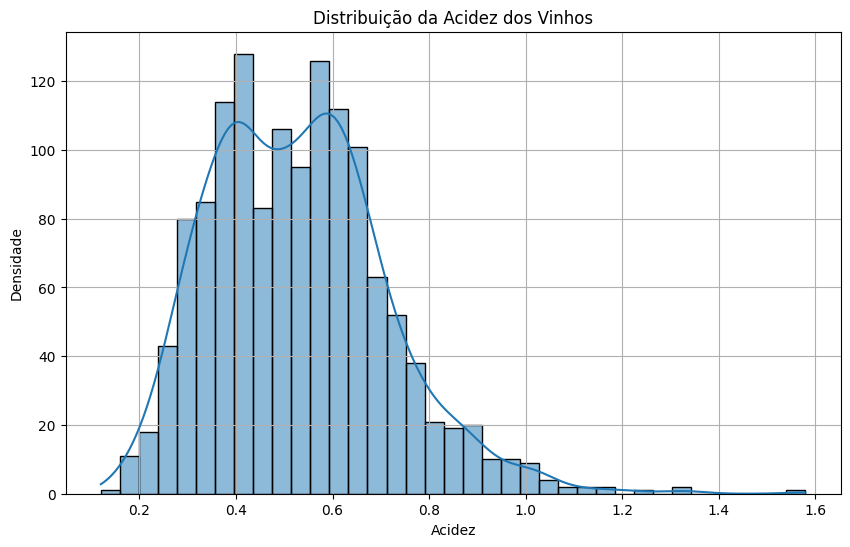

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(df['volatile acidity'], bins=37, kde=True)

plt.title("Distribuição da Acidez dos Vinhos")
plt.xlabel("Acidez")
plt.ylabel("Densidade")
plt.grid(True)
plt.show()

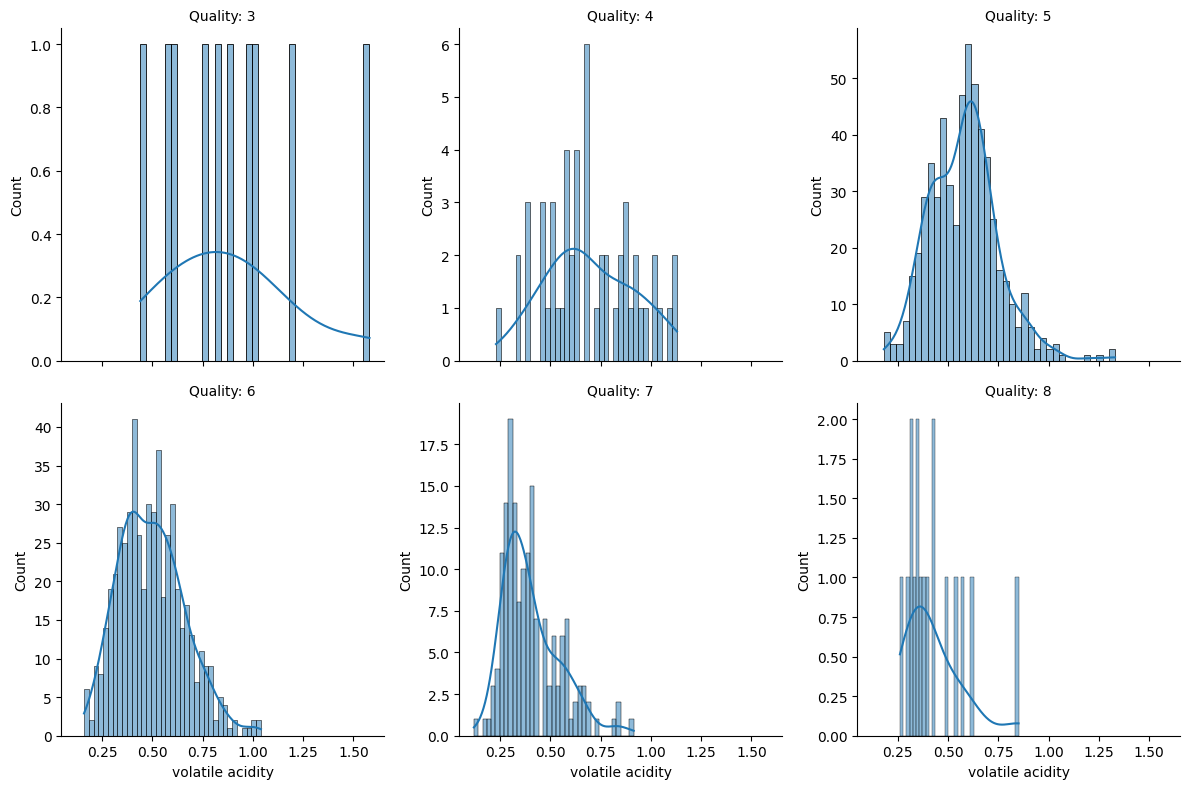

In [32]:
g = sns.FacetGrid(df, col="quality", col_wrap=3, height=4, sharey=False)
g.map(sns.histplot, "volatile acidity", bins=37, kde=True)
g.set_titles("Quality: {col_name}")

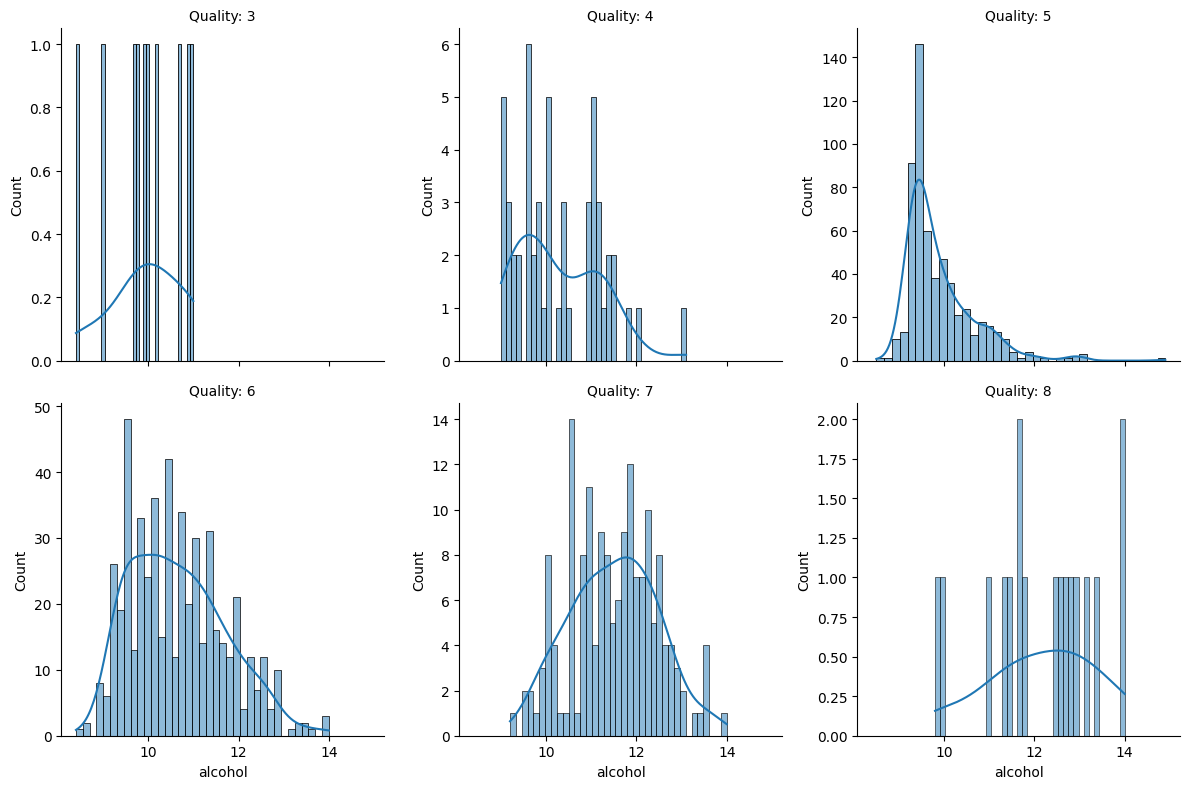

In [33]:
g = sns.FacetGrid(df, col="quality", col_wrap=3, height=4, sharey=False)
g.map(sns.histplot, "alcohol", bins=37, kde=True)
g.set_titles("Quality: {col_name}")

<Axes: xlabel='volatile acidity', ylabel='alcohol'>

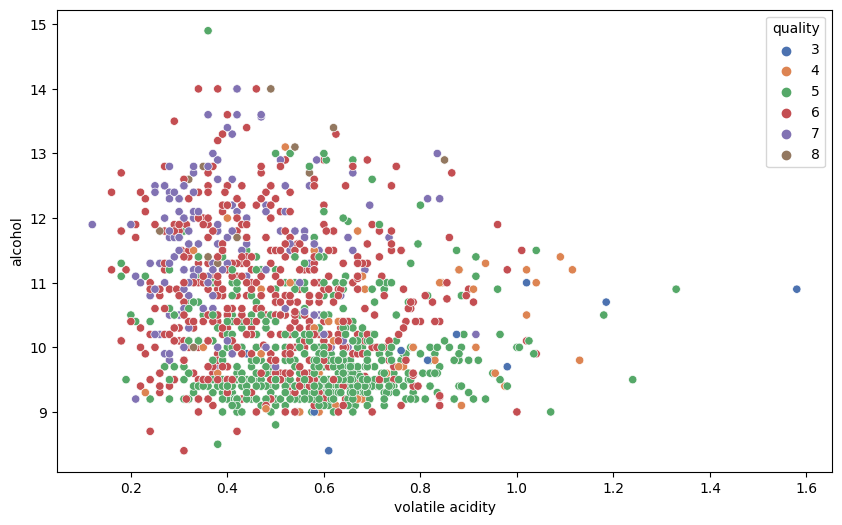

In [38]:
#plotting relation between two variables - scatterplot teor alcoolico x acidez do vinho 
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="volatile acidity", y="alcohol", hue="quality", palette = "deep")

## Relacao entre teor alcólico e qualidade do vinho. 
para expressar essa relacao é útil usar boxplots, gráficos de violino, distribuição de barra com erro

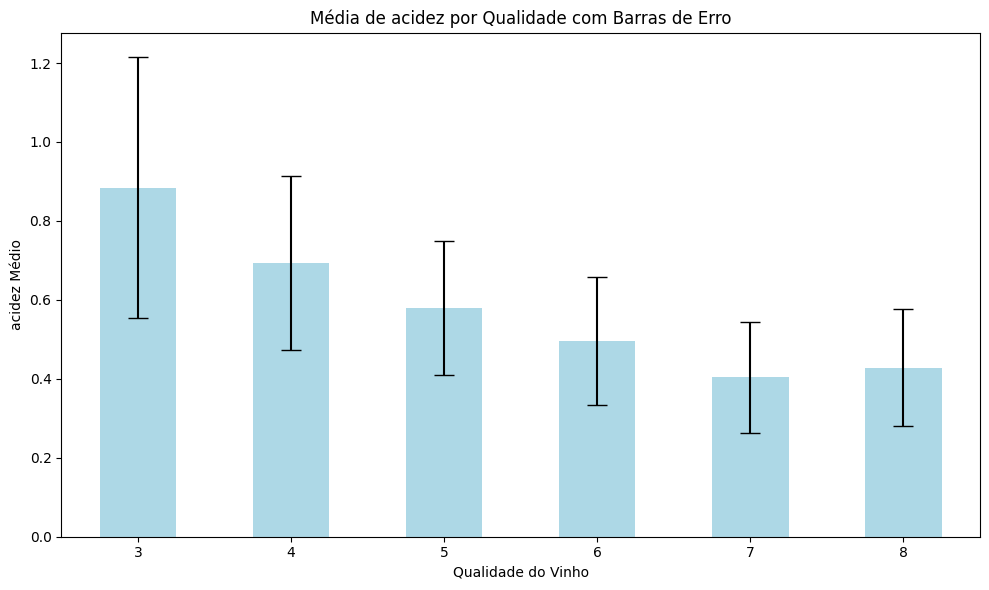

In [45]:
#relacao entre teor alcoolico e qualidade do vinho
media_acidez = df.groupby('quality')['volatile acidity'].mean()
std_acidez = df.groupby('quality')['volatile acidity'].std()

plt.figure(figsize=(10, 6))
media_acidez.plot(kind='bar', yerr=std_acidez, capsize=7, color='lightblue')
plt.title("Média de acidez por Qualidade com Barras de Erro")
plt.xlabel("Qualidade do Vinho")
plt.ylabel("acidez Médio")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Respostas 
Os vinhos de qualidade elevada são menos ácidos em comparação aos demais. 
aparentemente os vinhos de qualidade elevada tem menos acidez, aparentemente quantidade de alcool média enquanto que alguns de menor qualidade têm + alcool. 
